<a href="https://colab.research.google.com/github/younghun-cha/Healthcare-Big-Data-Engineer/blob/main/AI/02-Data_Preprocessing/04_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering: Spaceship Titanic

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 불러오기

In [4]:
df = pd.read_csv('../dataset/spaceship-titanic.csv', index_col=0)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.shape

(8693, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## 2. 결측치 처리

In [8]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### 2-1 결측치 제외

In [9]:
# 누락된 값이 있는 행을 삭제
df.dropna(axis=0)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [10]:
# 누락된 값이 있는 열을 삭제
df.dropna(axis=1)

,Transported
PassengerId,
0001_01,False
0002_01,True
0003_01,False
0003_02,False
0004_01,True
...,...
9276_01,False
9278_01,False
9279_01,True


In [11]:
# 모든 열이 NaN인 행을 삭제
df.dropna(how='all') 

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [12]:
df['Age'].value_counts().sort_values(ascending = False)

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [13]:
# 컬럼 단위로 삭제
df['Age'].dropna()

PassengerId
0001_01    39.0
0002_01    24.0
0003_01    58.0
0003_02    33.0
0004_01    16.0
           ... 
9276_01    41.0
9278_01    18.0
9279_01    26.0
9280_01    32.0
9280_02    44.0
Name: Age, Length: 8514, dtype: float64

### 2-2 대체값 삽입 (Imputation)
1. 특정값(value) 삽입
1. 통계적 방법 - mean, median 등

In [14]:
df['VRDeck'].fillna(0, inplace =True)
df['Age'].fillna(df['Age'].mean(), inplace =True)
df['RoomService'].fillna(0, inplace =True)
df['ShoppingMall'].fillna(0, inplace =True)
df['Spa'].fillna(0, inplace =True)
df['FoodCourt'].fillna(0, inplace =True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [15]:
df['CryoSleep'].fillna(False, inplace = True)
df['VIP'].fillna(False, inplace = True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [16]:
df.isnull().sum()

HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

## 3. 범주형 변수 처리
1. Label Encoding
1. One Hot Encoding

In [17]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

### 3-1 Label Encoding: pandas map() 메서드

In [18]:
df['Transported_map'] = df['Transported'].map({False:0, True :1})
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Transported_map
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


### 3-2 Class 레이블 인코딩

In [19]:
from sklearn.preprocessing import LabelEncoder

# 사이킷런의 LabelEncoder을 사용한 레이블 인코딩
class_le = LabelEncoder()
df['Transported_label'] = class_le.fit_transform(df['Transported'].values)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Transported_map,Transported_label
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [20]:
# 거꾸로 매핑
class_le.inverse_transform(df['Transported_label'])

array([False,  True, False, ...,  True, False,  True])

In [21]:
class_le.classes_

array([False,  True])

### 3-3 One Hot Encoding
1. pandas get_dummies( ) 함수
1. sklearn OneHotEncoder( ) 함수

In [22]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [23]:
# get_dummies() 함수
pd.get_dummies(df['HomePlanet'], drop_first=True)

,Europa,Mars
PassengerId,,
0001_01,1,0
0002_01,0,0
0003_01,1,0
0003_02,1,0
0004_01,0,0
...,...,...
9276_01,1,0
9278_01,0,0
9279_01,0,0


In [24]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Transported_map,Transported_label
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


##  4. 상관관계

In [25]:
df2 = df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported_label']]
df2.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_label
PassengerId,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1


In [26]:
df2.corr('pearson')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_label
Age,1.000000,0.068425,0.127343,0.032846,0.121071,0.099551,-0.074249
RoomService,0.068425,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.127343,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.032846,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.121071,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,0.099551,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874
Transported_label,-0.074249,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000


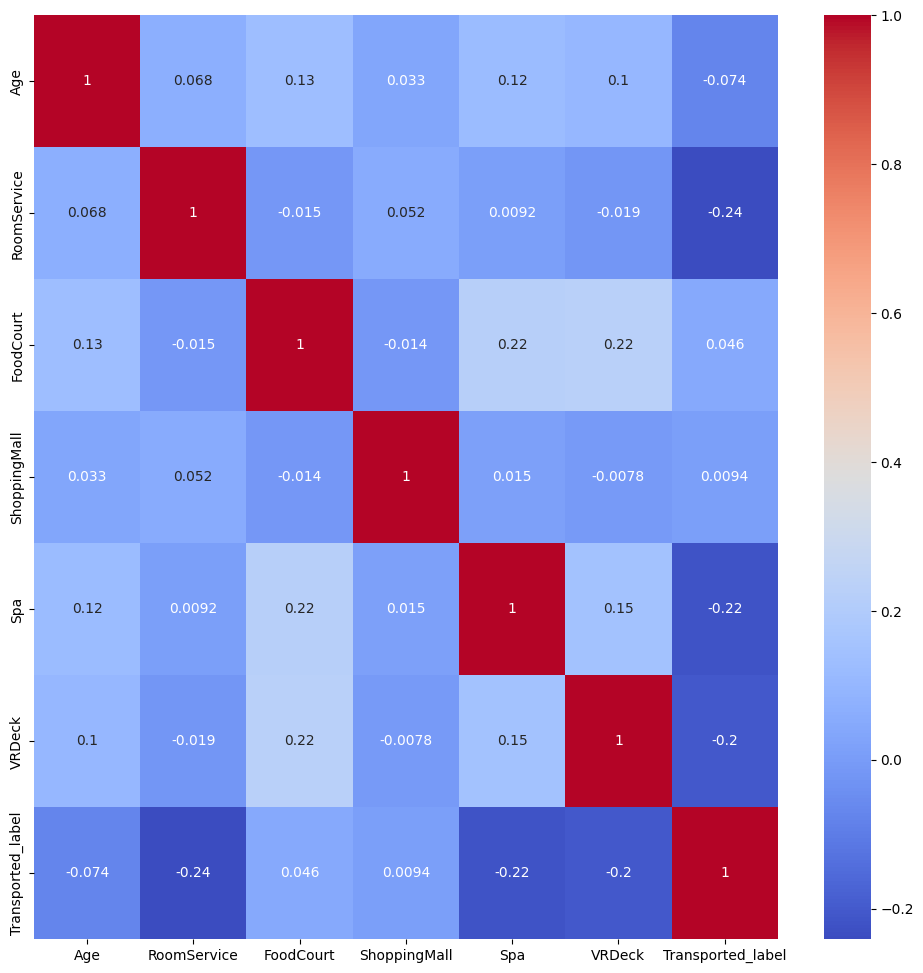

In [27]:
plt.figure(figsize=(12, 12))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.show()

## 5. Train/Test Split

In [28]:
from sklearn.model_selection import train_test_split

X = df2.drop(['Transported_label'], axis=1)
y = df2['Transported_label']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6085, 6)
(2608, 6)
(6085,)
(2608,)


## 6. Feature Scaling

### 6.1 최소-최대 스케일링(min-max scaling):

$x^{(i)}_{norm} = \dfrac{x^{(i)}-x_{min}}{x_{max}-x_{min}}$

In [29]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### 6.2 표준화(standardization):
$x^{(i)}_{std} = \dfrac{x^{(i)}-\mu_x}{\sigma_x}$

In [30]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### 6.3 표준화와 정규화 차이

In [31]:
ex = np.array([0, 1, 2, 3, 4, 5])

# 표준화
print('표준화:', (ex - ex.mean()) / ex.std())

# 정규화
print('정규화:', (ex - ex.min()) / (ex.max() - ex.min()))

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화: [0.  0.2 0.4 0.6 0.8 1. ]


### 6.4 Robust Scaler
`RobustScaler`는 중간값(q2) 값을 빼고 1사분위(q1)와 3사분위(q3)의 차이로 나누어 데이터의 스케일을 조정

$ x_{robust}^{(i)} = \dfrac{x^{(i)} - q_2}{q_3 - q_1}$

In [32]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

In [33]:
(ex - np.percentile(ex, 50)) / (np.percentile(ex, 75) - np.percentile(ex, 25))

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

### 6.5 MaxAbs Scaler
- `MaxAbsScaler`는 각 특성별로 데이터를 최대 절댓값으로 나눕니다.
- 따라서 각 특성의 최댓값은 1이 되며, 전체 특성은 [-1, 1] 범위로 변경

In [34]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.transform(X_test)

In [35]:
ex / np.max(np.abs(ex))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

### 6.6 Scaler 비교

In [36]:
ex = np.array([0, 1, 2, 3, 4, 5])

In [37]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale, maxabs_scale

print('StandardScaler:', scale(ex))
print('MinMaxScaler:', minmax_scale(ex))
print('RobustScaler:', robust_scale(ex))
print('MaxAbsScaler:', maxabs_scale(ex))

StandardScaler: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
MinMaxScaler: [0.  0.2 0.4 0.6 0.8 1. ]
RobustScaler: [-1.  -0.6 -0.2  0.2  0.6  1. ]
MaxAbsScaler: [0.  0.2 0.4 0.6 0.8 1. ]
